# Transfer Learning

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from tqdm import tqdm
from tqdm.notebook import tqdm

In [ ]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
plt.ion()   # interactive mode
import requests

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import glob
import torchvision
from torchvision import datasets, models, transforms

In [45]:
import cv2
import seaborn as sns
from tqdm import tqdm 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras
import os
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
import os
import os.path
from pathlib import Path
import glob
import pandas as pd
import random

In [76]:
%%time

image_size = (120,120)
images = np.array([cv2.resize(cv2.imread(file), image_size)/255.0 for file in glob.glob(r'./data/*cell.png')])
labels = np.array([np.sum(plt.imread(file)/255.0) for file in glob.glob(r'./data/*dots.png')])


CPU times: user 897 ms, sys: 67.3 ms, total: 965 ms
Wall time: 958 ms


In [78]:
%%time

from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.20, random_state=42)

CPU times: user 25.7 ms, sys: 0 ns, total: 25.7 ms
Wall time: 26.6 ms


In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [135]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(120,120, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [136]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 64)       

In [137]:
model.compile(optimizer='adam',loss='mse', metrics=['mae'])


In [138]:
%%time
history = model.fit(data_train, labels_train, epochs=20, batch_size=16,
                    validation_data=(data_test, labels_test))

Epoch 1/20
10/10 [==============================] - 1s 44ms/step - loss: 0.2529 - mae: 0.4415 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 2/20
10/10 [==============================] - 0s 24ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 3/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 4/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 5/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 6/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 7/20
10/10 [==============================] - 0s 24ms/step - loss: 0.2491 - mae: 0.4401 - val_loss: 0.2602 - val_mae: 0.4399
Epoch 8/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2491 - m

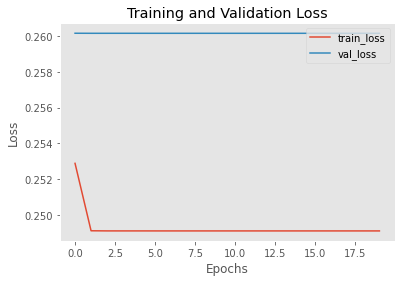

In [146]:
N = len(history.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(False)

In [149]:
results = model.evaluate(data_test, labels_test,return_dict = True)
print(f'Test MAE = ', results['mae'])

2/2 [==============================] - 0s 13ms/step - loss: 0.2602 - mae: 0.4399
Test MAE =  0.4399019777774811


**REsult** <br>
The MAE is 0.43  which is suspiciously low.  Possibly something went wrong :)